In [1]:

"""
There're 3 ways to measure Goodness of Fit
1. MAE: Easiest to understand
2. MSE: Heavy penalty for outliers
3. RMSE: Better Understand (Follow norm)
"""

"\nThere're 3 ways to measure Goodness of Fit\n1. MAE: Easiest to understand\n2. MSE: Heavy penalty for outliers\n3. RMSE: Better Understand (Follow norm)\n"

In [5]:

# 6.1.1 Linear Regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

amex_df = pd.read_csv('../chapter4/gen/amex_df.csv',
                           parse_dates=True,
                           index_col=0)

In [8]:

amex_close = amex_df.close
# x as independent variable
x = np.arange(0, amex_df.shape[0])
# y as dependent variable
y = amex_close.values

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     1180.
Date:                Thu, 06 Jun 2019   Prob (F-statistic):          1.12e-120
Time:                        11:27:29   Log-Likelihood:                -1101.5
No. Observations:                 397   AIC:                             2207.
Df Residuals:                     395   BIC:                             2215.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.1139      0.390    218.458      0.000      84.348      85.880
x1             0.0585      0.002     34.346      0.000       0.055       0.062
==============================================================================
Omnibus:                       65.821   Durbin-Watson:                   0.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.397
Skew:                          -0.837   Prob(JB):                     1.80e-34
Kurtosis:                       5.567   Cond. No.                         457.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

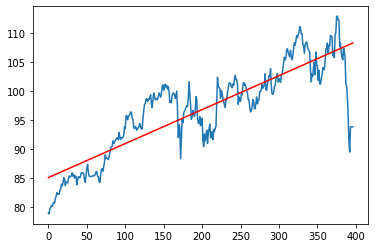

In [10]:

import statsmodels.api as sm
from statsmodels import regression

def regression_y(y):
    y = y
    # x Series
    x = np.arange(0, len(y))
    x = sm.add_constant(x)
    # Regression using OLS
    model = regression.linear_model.OLS(y, x).fit()
    return model

model = regression_y(y)
b = model.params[0]
k = model.params[1]
# y = kx + b
y_fit = k * x + b
plt.plot(x, y)
plt.plot(x, y_fit, 'r')
# summary() 
model.summary()

In [13]:

# Calculating Goodness of Fit

MAE = sum(np.abs(y - y_fit)) / len(y)
print('MAE: {}'.format(MAE))

MSE = sum(np.square(y - y_fit)) / len(y)
print('MSE: {}'.format(MSE))

RMSE = np.sqrt(sum(np.square(y - y_fit)) / len(y))
print('RMSE: {}'.format(RMSE))

MAE: 3.0228252787042744
MSE: 15.046656327802586
RMSE: 3.8790019757410006


In [14]:
# TODO: Why the diff in the end of 15th and 16th decimals places
from sklearn import metrics
print('MAE: {}'.format(metrics.mean_absolute_error(y, y_fit)))
print('MSE: {}'.format(metrics.mean_squared_error(y, y_fit)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y, y_fit))))

MAE: 3.0228252787042735
MSE: 15.046656327802593
RMSE: 3.8790019757410015
